# Import libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

# Read the data

In [48]:
data = pd.read_csv('Loan.csv')

In [49]:
data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,2,Own,183,0.354418,1,2,0.358336,0,Home,0,29,9,7632,1202,146111,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,1,Mortgage,496,0.087827,5,3,0.330274,0,Debt Consolidation,0,21,9,4627,3460,53204,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,2,Rent,902,0.137414,2,0,0.244729,0,Education,0,20,22,886,895,25176,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,1,Mortgage,755,0.267587,2,1,0.436244,0,Home,0,27,10,1675,1217,104822,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,1,Mortgage,274,0.320535,0,0,0.078884,0,Debt Consolidation,0,26,27,1555,4981,244305,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


# Classification vs Regression - Comparing Target variables

In [50]:
data['RiskScore'].describe()

count    20000.000000
mean        50.766780
std          7.778262
min         28.800000
25%         46.000000
50%         52.000000
75%         56.000000
max         84.000000
Name: RiskScore, dtype: float64

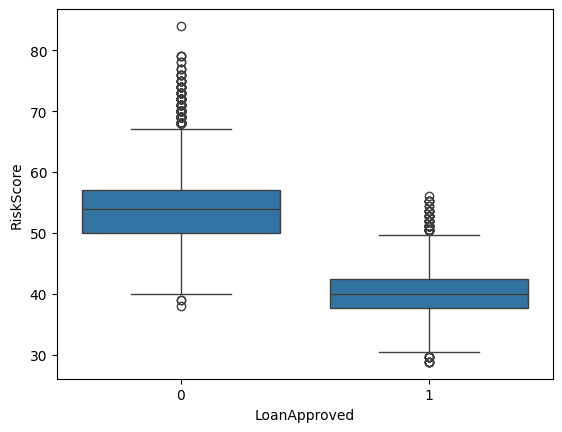

In [51]:
sns.boxplot(data=data, x="LoanApproved", y="RiskScore")
plt.show()

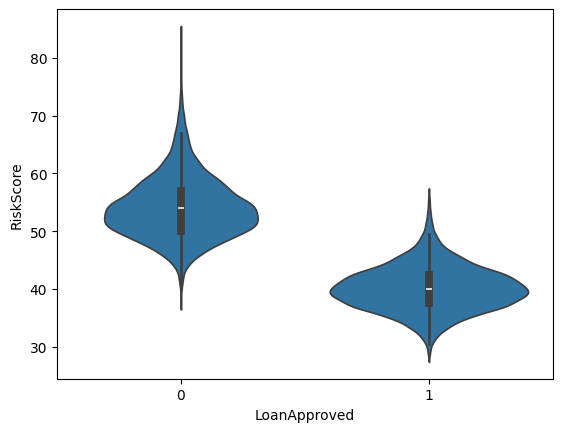

In [52]:
sns.violinplot(data=data, x="LoanApproved", y="RiskScore")
plt.show()

# Qualitative Analysis (Clasisfication Task)

In [53]:
data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,2,Own,183,0.354418,1,2,0.358336,0,Home,0,29,9,7632,1202,146111,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,1,Mortgage,496,0.087827,5,3,0.330274,0,Debt Consolidation,0,21,9,4627,3460,53204,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,2,Rent,902,0.137414,2,0,0.244729,0,Education,0,20,22,886,895,25176,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,1,Mortgage,755,0.267587,2,1,0.436244,0,Home,0,27,10,1675,1217,104822,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,1,Mortgage,274,0.320535,0,0,0.078884,0,Debt Consolidation,0,26,27,1555,4981,244305,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [54]:
data.shape

(20000, 36)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

## Null Rate

In [56]:
print("Null rates for each column:")
data.isnull().mean() * 100

Null rates for each column:


ApplicationDate               0.0
Age                           0.0
AnnualIncome                  0.0
CreditScore                   0.0
EmploymentStatus              0.0
EducationLevel                0.0
Experience                    0.0
LoanAmount                    0.0
LoanDuration                  0.0
MaritalStatus                 0.0
NumberOfDependents            0.0
HomeOwnershipStatus           0.0
MonthlyDebtPayments           0.0
CreditCardUtilizationRate     0.0
NumberOfOpenCreditLines       0.0
NumberOfCreditInquiries       0.0
DebtToIncomeRatio             0.0
BankruptcyHistory             0.0
LoanPurpose                   0.0
PreviousLoanDefaults          0.0
PaymentHistory                0.0
LengthOfCreditHistory         0.0
SavingsAccountBalance         0.0
CheckingAccountBalance        0.0
TotalAssets                   0.0
TotalLiabilities              0.0
MonthlyIncome                 0.0
UtilityBillsPaymentHistory    0.0
JobTenure                     0.0
NetWorth      

## Exploring Each Variable

In [57]:
numerical_features = [
    'Age', 
    'AnnualIncome', 
    'CreditScore',
    'Experience',
    'LoanAmount',
    'LoanDuration',
    'NumberOfDependents',
    'MonthlyDebtPayments',
    'CreditCardUtilizationRate',
    'NumberOfOpenCreditLines',
    'NumberOfCreditInquiries',
    'DebtToIncomeRatio',
    'BankruptcyHistory',
    'PreviousLoanDefaults',
    'PaymentHistory',
    'LengthOfCreditHistory',
    'SavingsAccountBalance',
    'CheckingAccountBalance',
    'TotalAssets',
    'TotalLiabilities',
    'MonthlyIncome',
    'UtilityBillsPaymentHistory',
    'JobTenure',
    'NetWorth',
    'BaseInterestRate',
    'InterestRate',
    'MonthlyLoanPayment',
    'TotalDebtToIncomeRatio'
]
print(f'Number of numerical features: {len(numerical_features)}')

Number of numerical features: 28


In [58]:
categorical_features = [
    'EmploymentStatus',
    'EducationLevel',
    'MaritalStatus',
    'HomeOwnershipStatus',
    'LoanPurpose'
]
print(f'Number of categorical features: {len(categorical_features)}')

Number of categorical features: 5


#### ApplicationDate

In [59]:
data['ApplicationDate']

0        2018-01-01
1        2018-01-02
2        2018-01-03
3        2018-01-04
4        2018-01-05
            ...    
19995    2072-09-29
19996    2072-09-30
19997    2072-10-01
19998    2072-10-02
19999    2072-10-03
Name: ApplicationDate, Length: 20000, dtype: object

In [60]:
data.drop(columns=['ApplicationDate'], inplace=True)

In [61]:
data.shape

(20000, 35)

### Exploring Numerical Features

In [62]:
pd.options.display.max_columns = None
print('Statistics of numerical variables: \n')
data[numerical_features].describe()

Statistics of numerical variables: 



,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,2.000000e+04,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,0.993000,0.285735,0.052400,0.100050,23.993650,14.957300,4946.052150,1782.555100,9.696440e+04,3.625241e+04,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,0.986965,0.160211,0.222838,0.300074,4.945436,8.371552,6604.887477,2245.378812,1.207999e+05,4.725151e+04,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,0.000000,0.001720,0.000000,0.000000,8.000000,1.000000,73.000000,24.000000,2.098000e+03,3.720000e+02,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,0.000000,0.161035,0.000000,0.000000,21.000000,8.000000,1541.750000,551.000000,3.118025e+04,1.119675e+04,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,1.000000,0.264454,0.000000,0.000000,24.000000,15.000000,2986.000000,1116.000000,6.069900e+04,2.220300e+04,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,2.000000,0.390327,0.000000,0.000000,27.000000,22.000000,5873.250000,2126.000000,1.174052e+05,4.314650e+04,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,7.000000,0.902253,1.000000,1.000000,45.000000,29.000000,200089.000000,52572.000000,2.619627e+06,1.417302e+06,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657


### Exploring Categorical Features

In [63]:
data[categorical_features].describe()

,EmploymentStatus,EducationLevel,MaritalStatus,HomeOwnershipStatus,LoanPurpose
count,20000,20000,20000,20000,20000
unique,3,5,4,4,5
top,Employed,Bachelor,Married,Mortgage,Home
freq,17036,6054,10041,7939,5925


In [64]:
print('Unique values in categorical features:')
for feature in categorical_features:
    print(f'\n{feature}: {data[feature].unique()}')

Unique values in categorical features:

EmploymentStatus: ['Employed' 'Self-Employed' 'Unemployed']

EducationLevel: ['Master' 'Associate' 'Bachelor' 'High School' 'Doctorate']

MaritalStatus: ['Married' 'Single' 'Divorced' 'Widowed']

HomeOwnershipStatus: ['Own' 'Mortgage' 'Rent' 'Other']

LoanPurpose: ['Home' 'Debt Consolidation' 'Education' 'Other' 'Auto']


## Target Variable Distribution

In [65]:
data['LoanApproved'].unique()

array([0, 1])

In [66]:
print('Class value counts: ')
data['LoanApproved'].value_counts()

Class value counts: 


LoanApproved
0    15220
1     4780
Name: count, dtype: int64

In [67]:
print('Percentages for class value counts: ')
data['LoanApproved'].value_counts(normalize=True)

Percentages for class value counts: 


LoanApproved
0    0.761
1    0.239
Name: proportion, dtype: float64

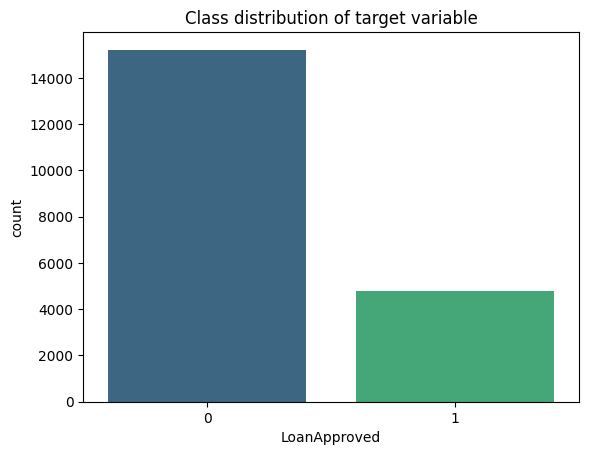

In [68]:
sns.countplot(data, x="LoanApproved", palette="viridis")
plt.title('Class distribution of target variable')
plt.show()

## Distribution of Categorical Features

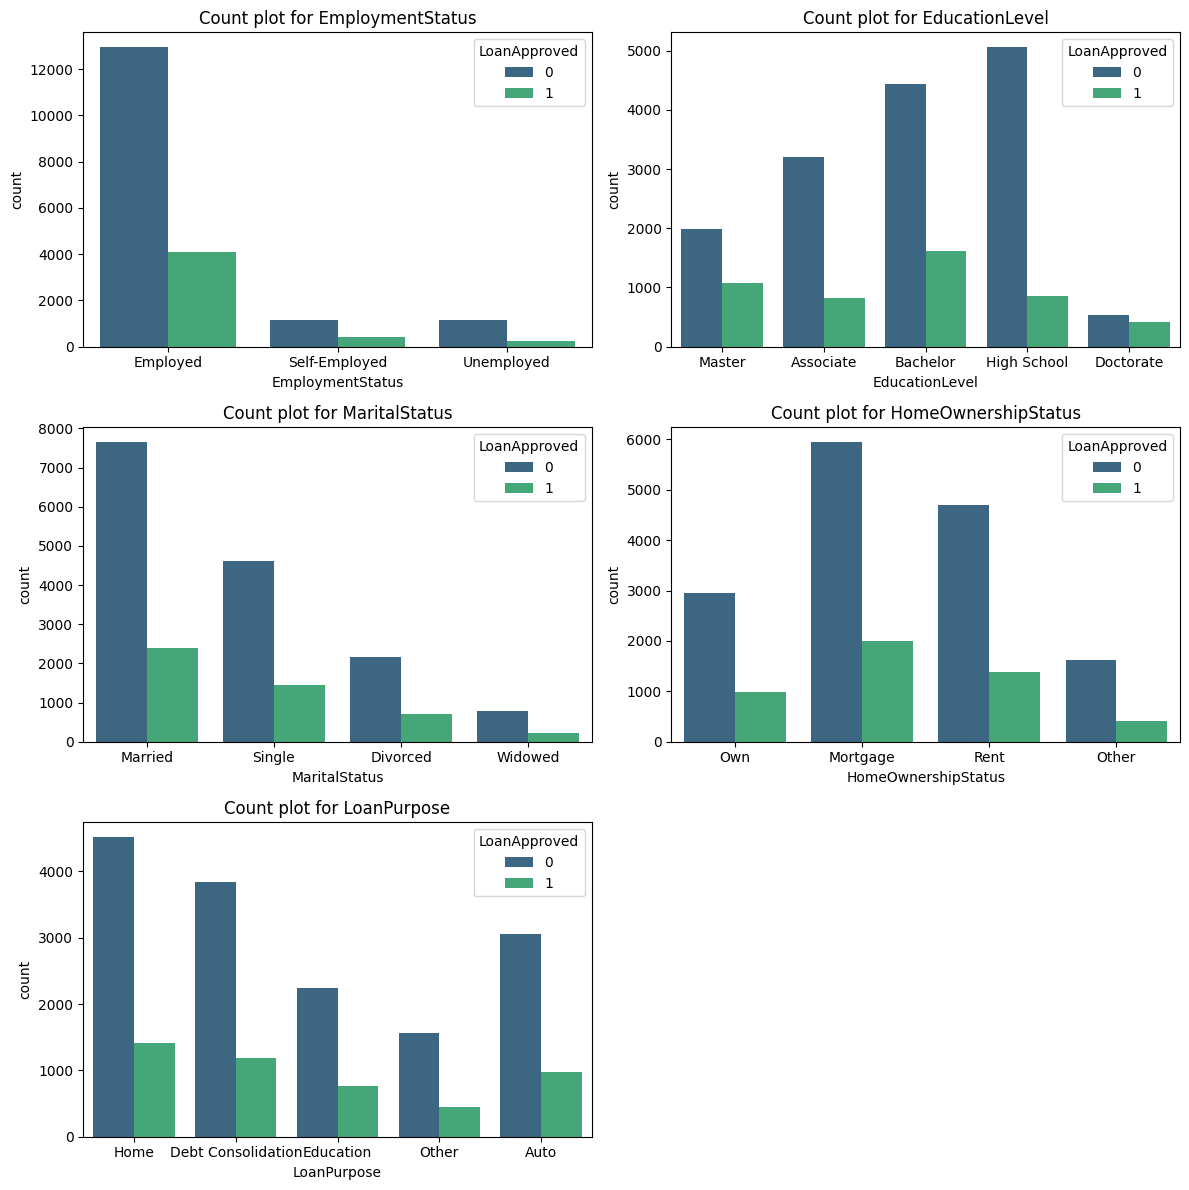

In [69]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

axes = axes.flatten()
for i, col in enumerate(categorical_features):
    sns.countplot(data=data, x=col, ax=axes[i], hue="LoanApproved", palette="viridis", legend=True)
    axes[i].set_title(f"Count plot for {col}")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

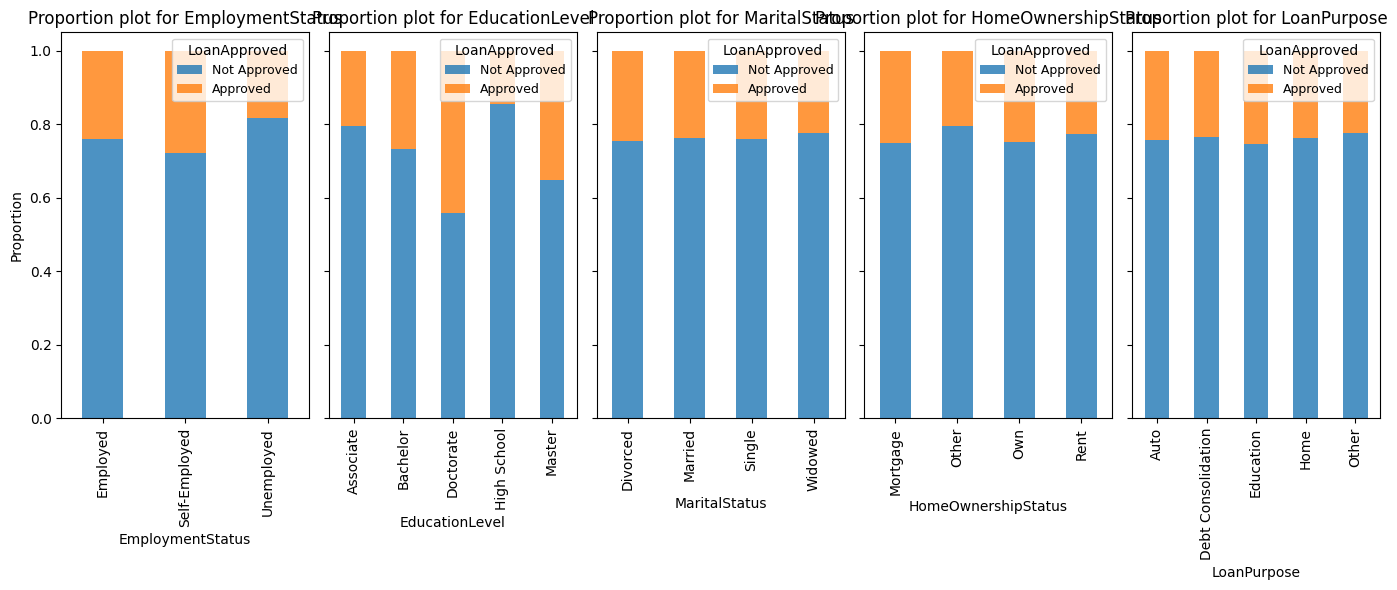

In [76]:
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_features), figsize=(14, 6), sharey=True)

if len(categorical_features) == 1: 
    axes = [axes]

for i, col in enumerate(categorical_features):
    counts = data.groupby([col, 'LoanApproved']).size().unstack(fill_value=0)
    proportions = counts.div(counts.sum(axis=1), axis=0)
    
    proportions.plot(
        kind='bar',
        stacked=True,
        ax=axes[i],
        color=["#1f77b4", "#ff7f0e"],
        alpha=0.8,
    )
    axes[i].set_title(f"Proportion plot for {col}", fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel("Proportion", fontsize=10)
    axes[i].legend(["Not Approved", "Approved"], title="LoanApproved", fontsize=9)

plt.tight_layout()
plt.show()

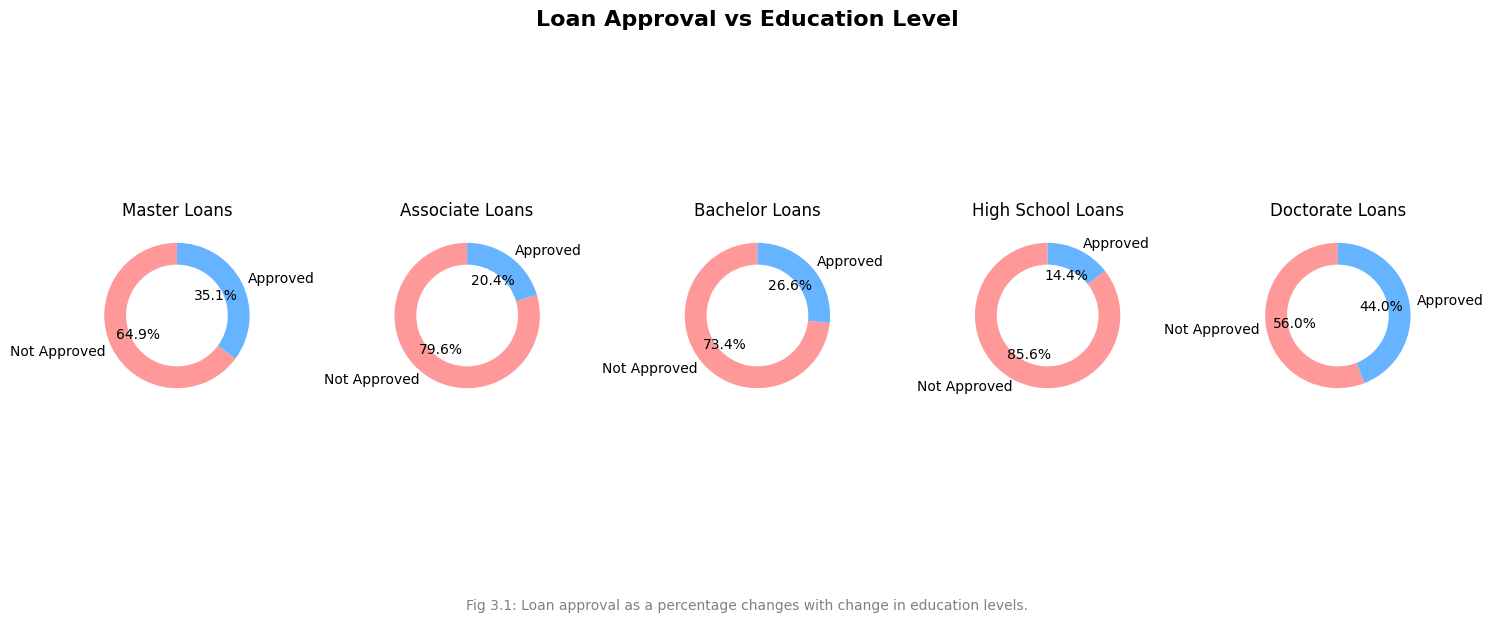

In [79]:
education_levels = data['EducationLevel'].unique()

fig, axes = plt.subplots(1, len(education_levels), figsize=(15, 6))

for i, level in enumerate(education_levels):
    subset = data[data['EducationLevel'] == level]
    
    counts = subset['LoanApproved'].value_counts(normalize=True)  # Proportions
    labels = counts.index.map({0: 'Not Approved', 1: 'Approved'})
    
    wedges, texts, autotexts = axes[i].pie(
        counts,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=["#ff9999", "#66b3ff"], 
        wedgeprops=dict(width=0.3) 
    )
    
    axes[i].set_title(f'{level} Loans', fontsize=12)
plt.suptitle('Loan Approval vs Education Level', fontsize=16, fontweight='bold')

fig.text(0.5, -0.02, 'Fig 3.1: Loan approval as a percentage changes with change in education levels.', 
         ha='center', fontsize=10, color='gray')
plt.tight_layout()
plt.show()

## Distribution of Numerical Features

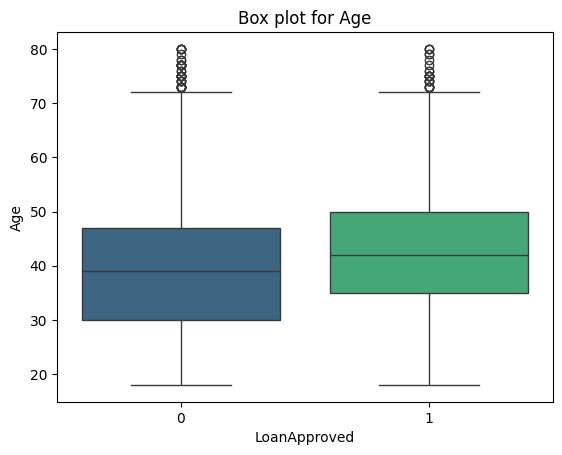

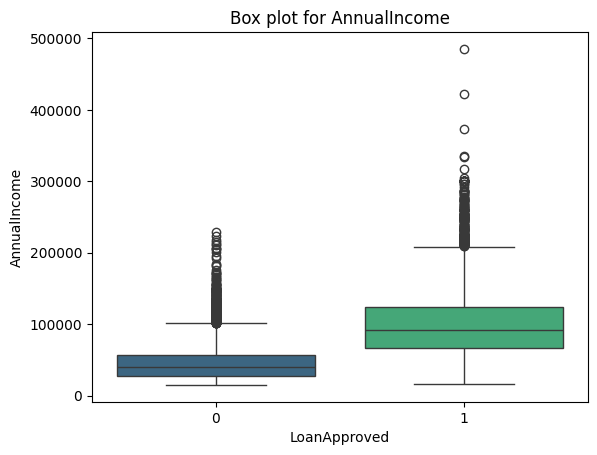

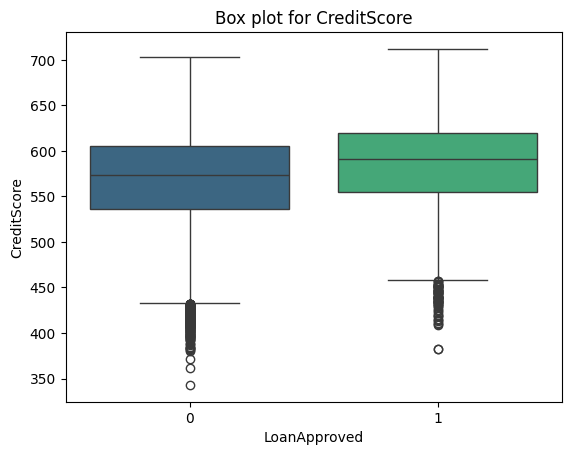

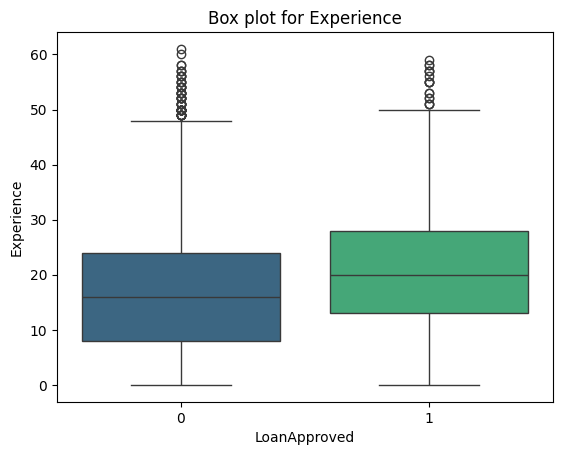

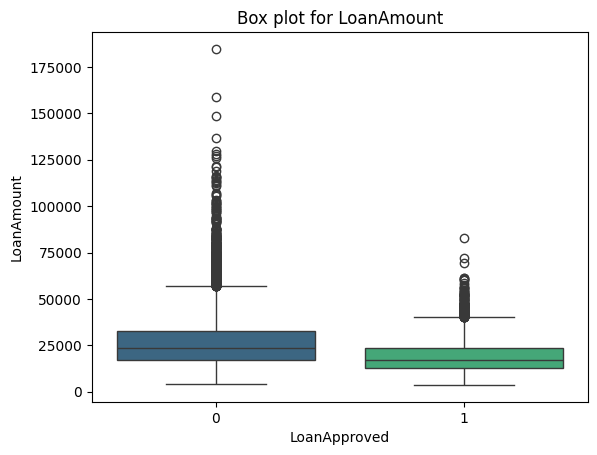

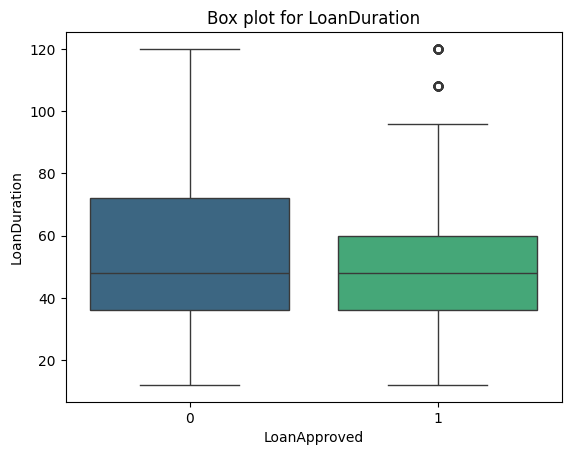

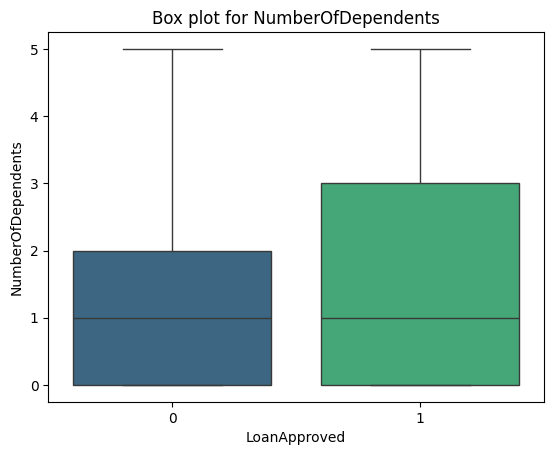

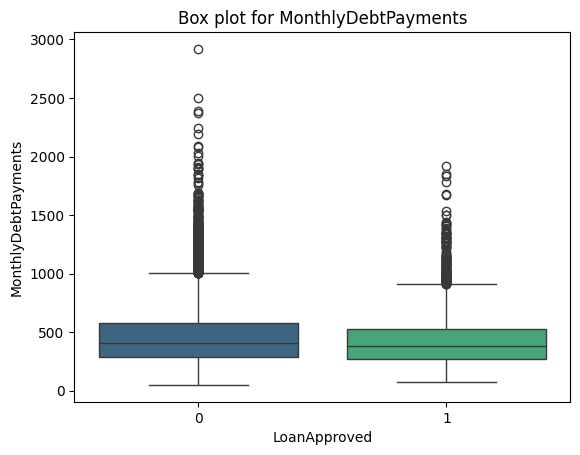

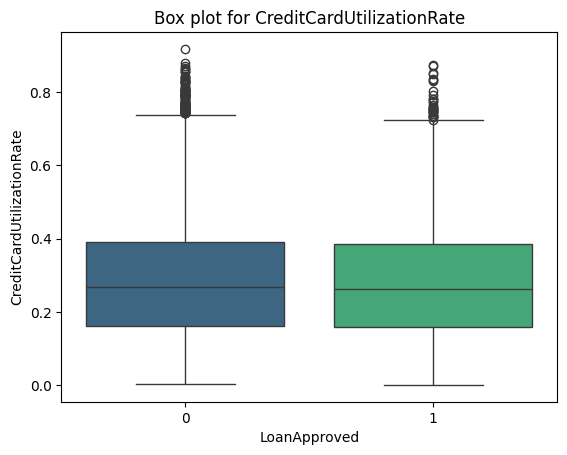

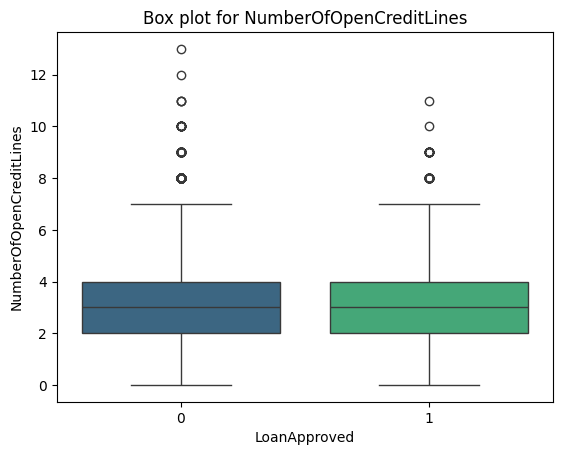

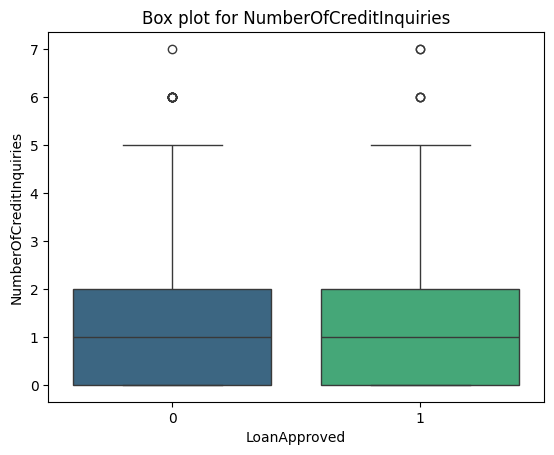

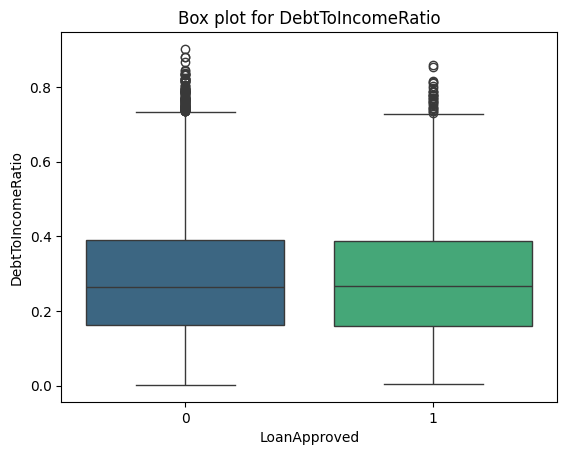

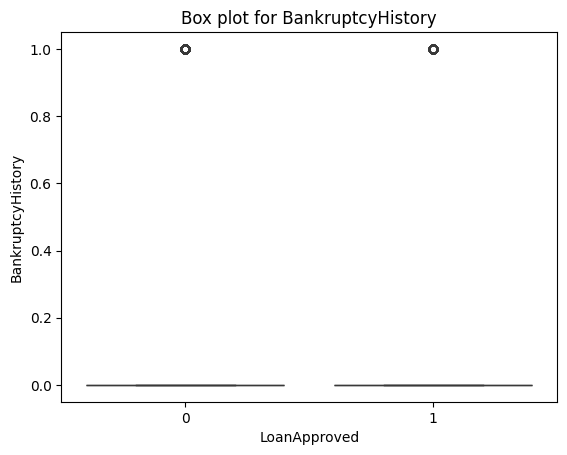

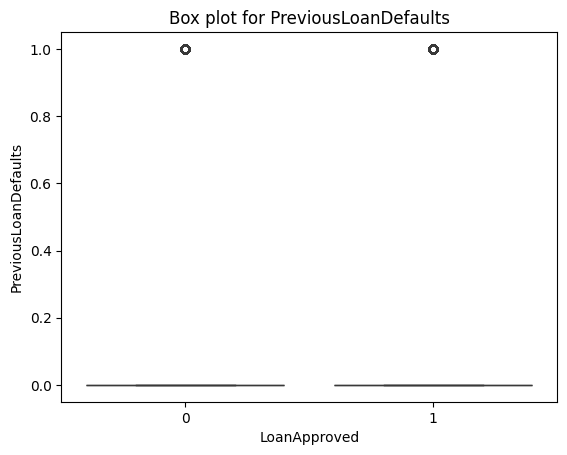

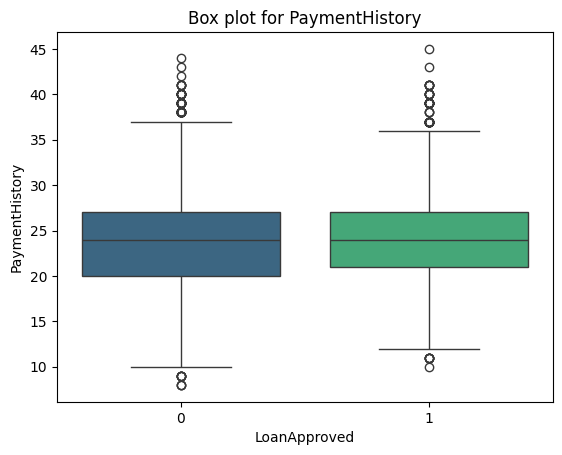

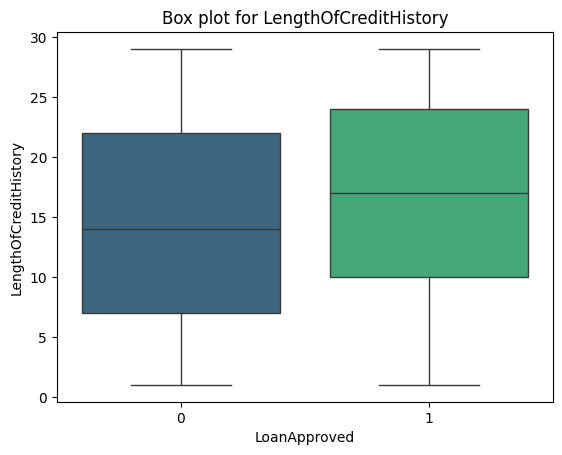

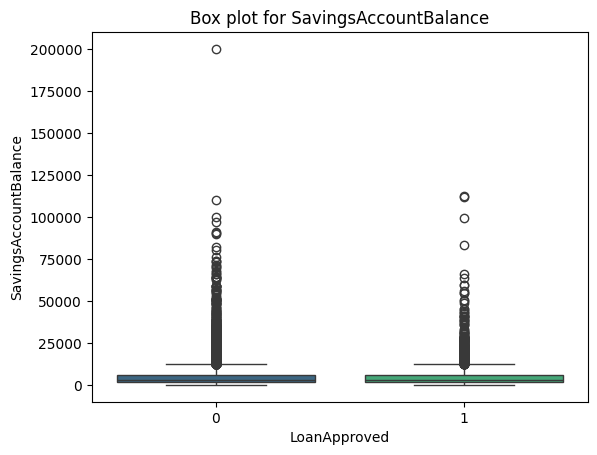

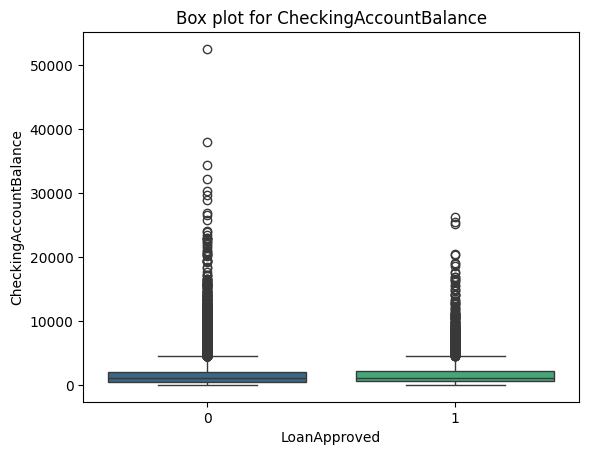

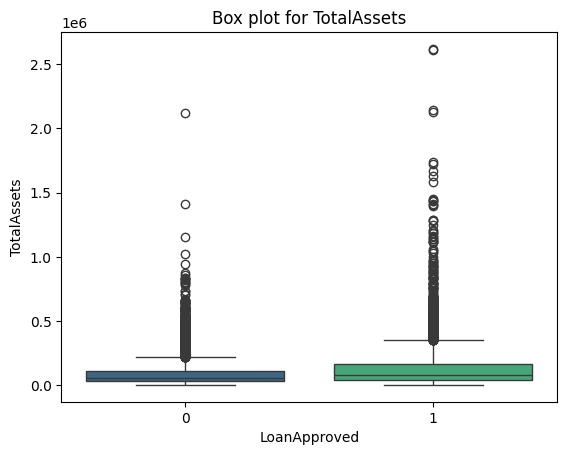

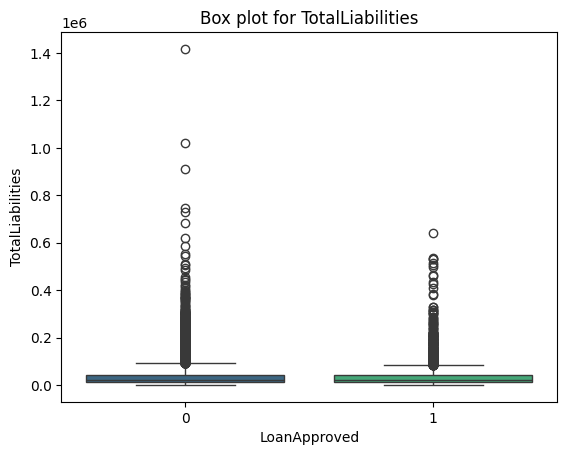

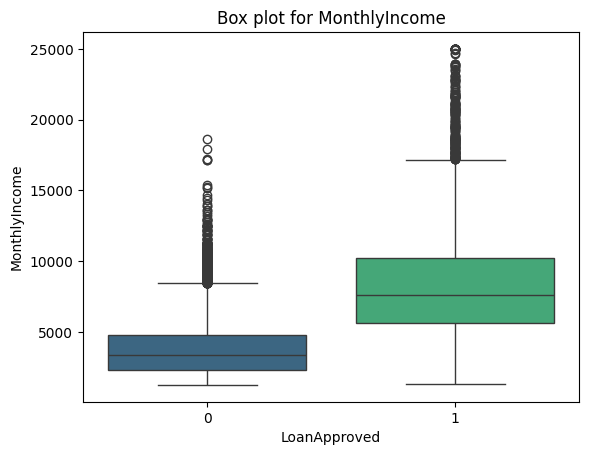

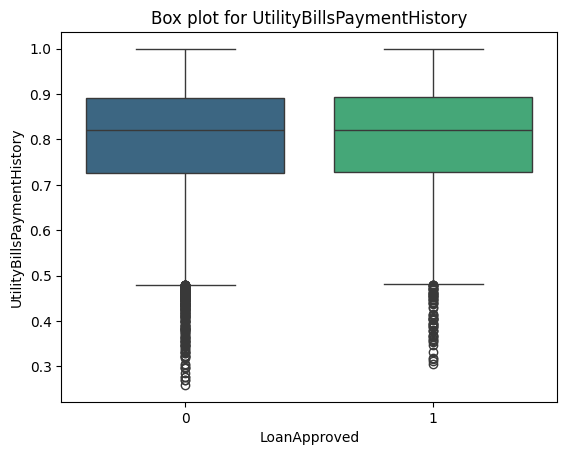

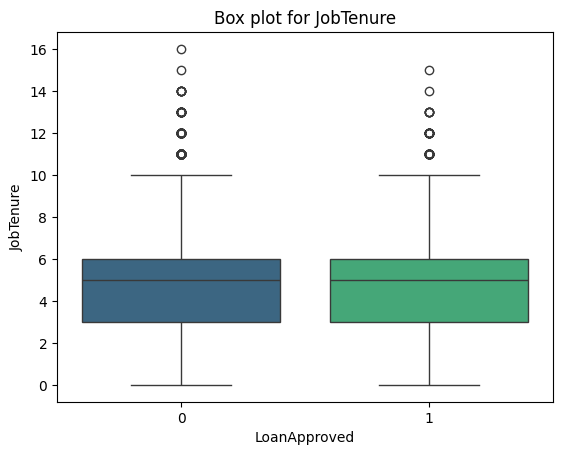

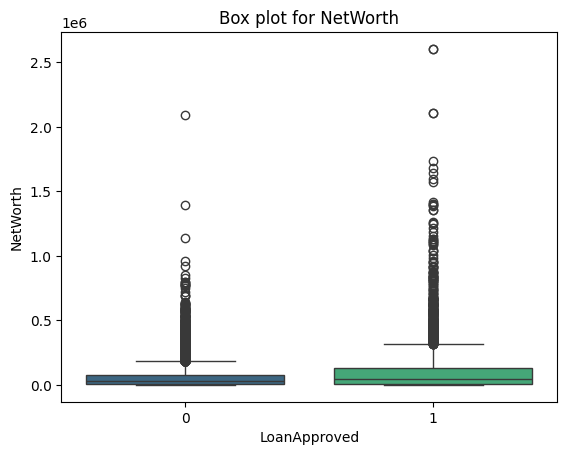

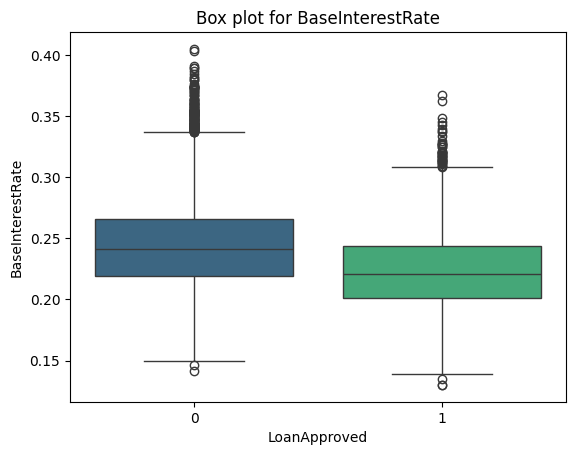

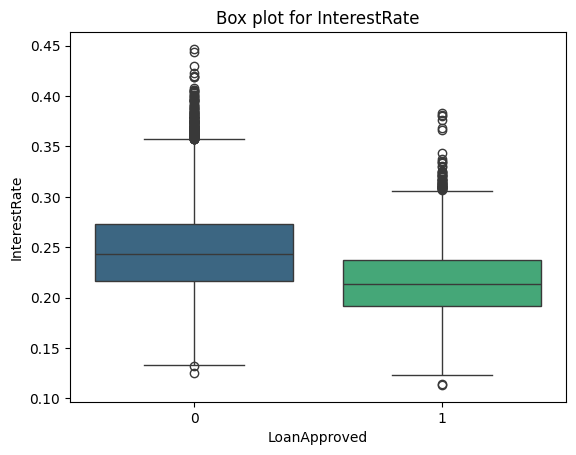

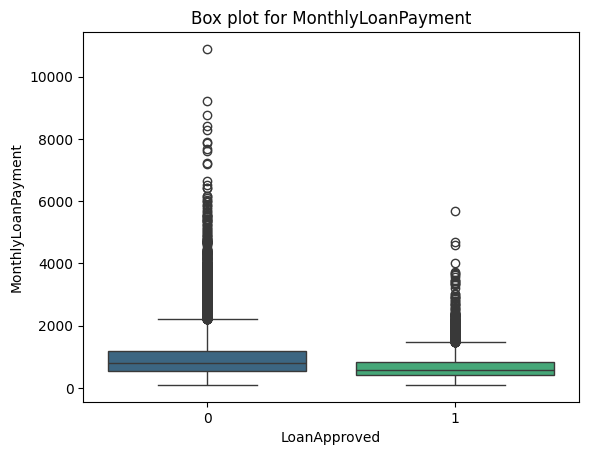

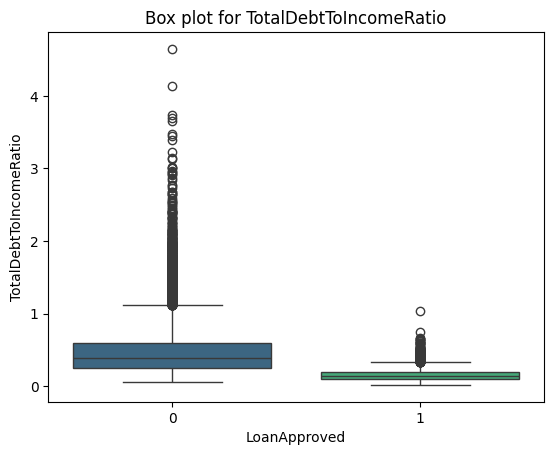

In [71]:
for i, col in enumerate(numerical_features):
    sns.boxplot(data=data, x="LoanApproved", palette="viridis", y=col)
    plt.title(f"Box plot for {col}")
    plt.show()

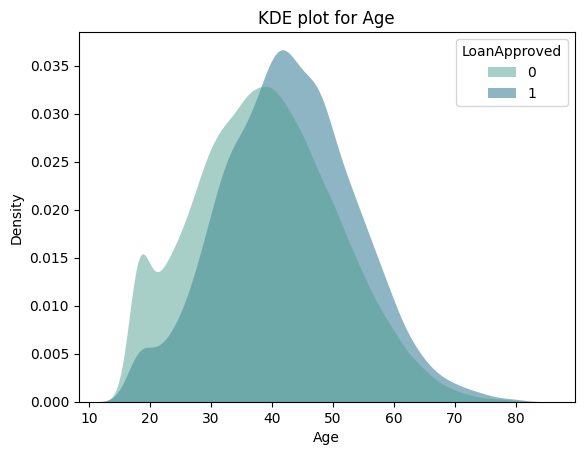

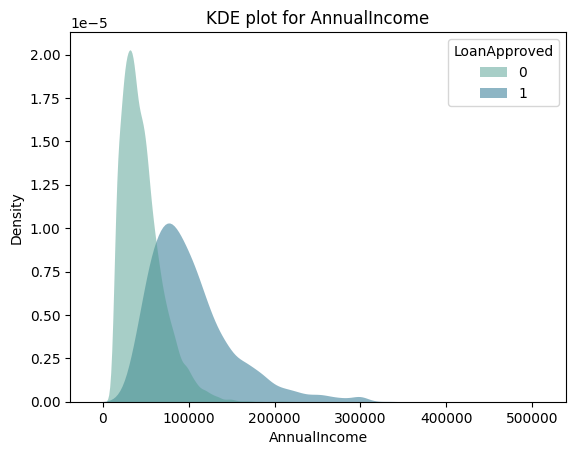

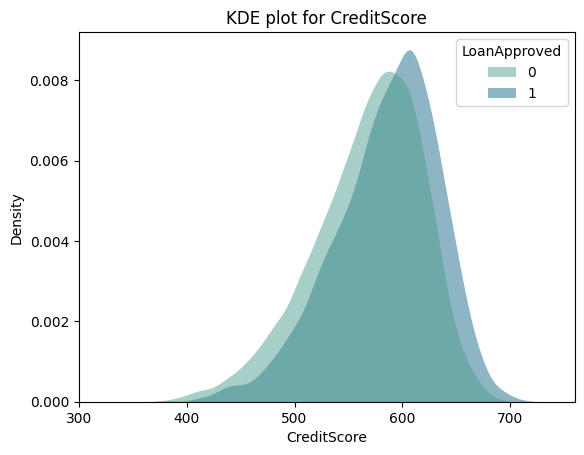

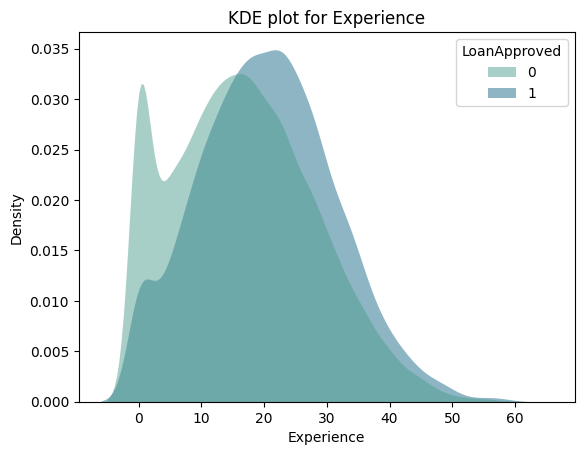

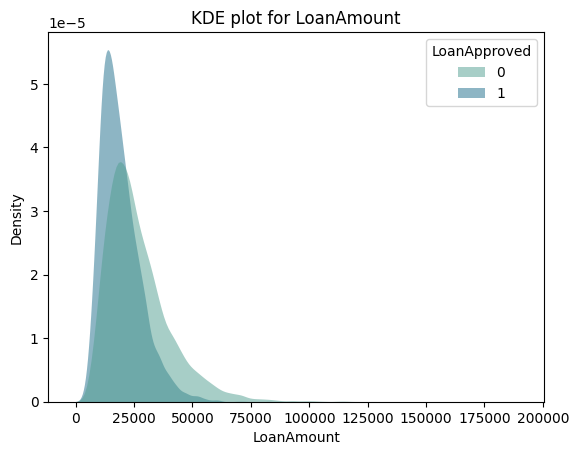

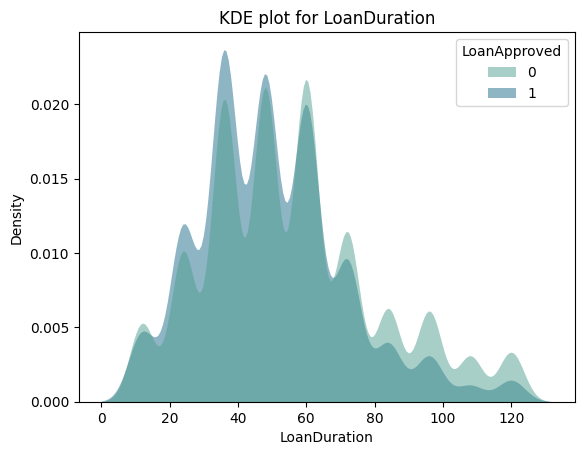

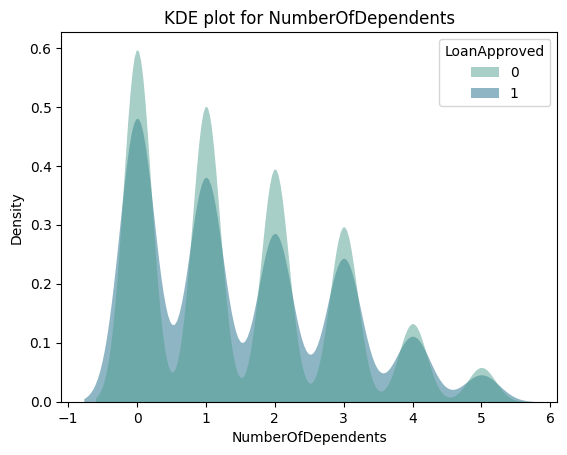

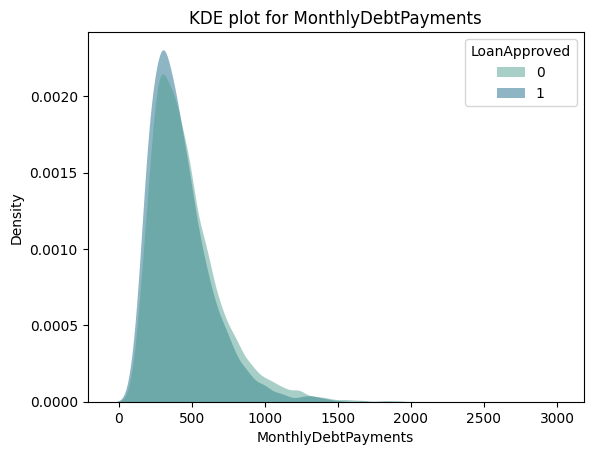

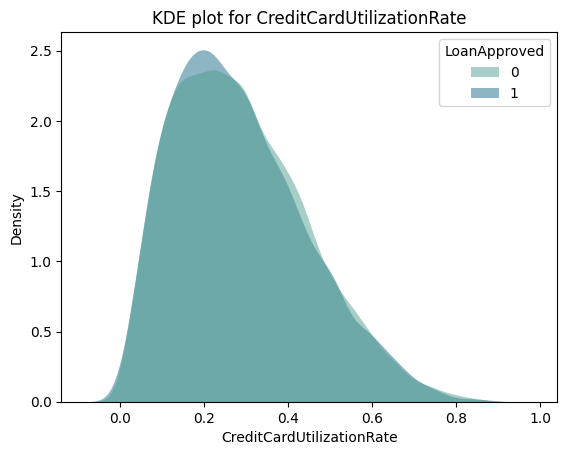

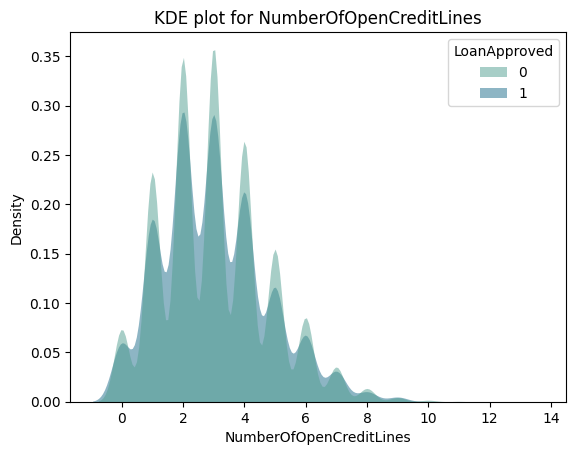

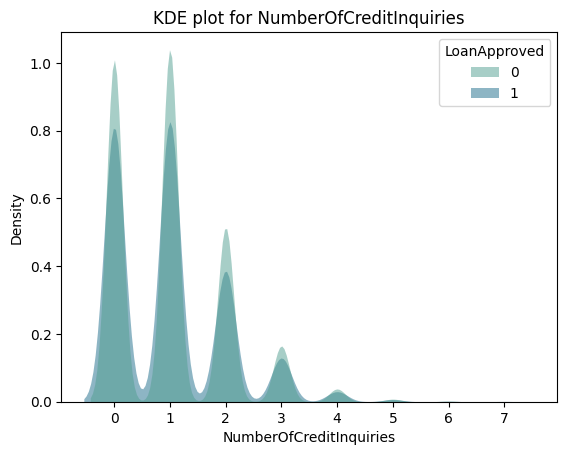

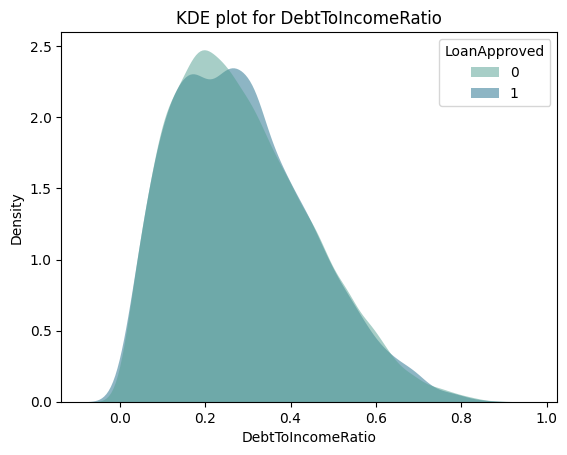

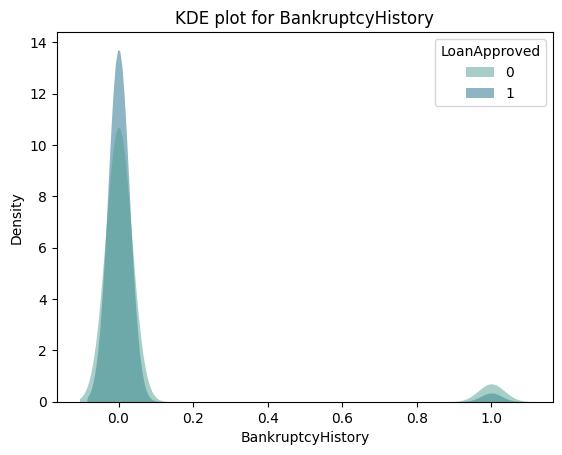

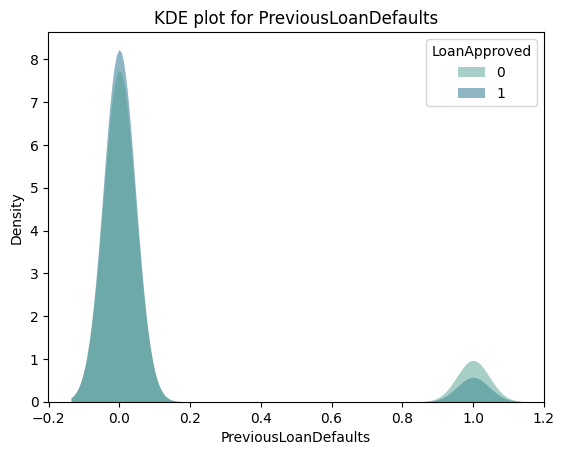

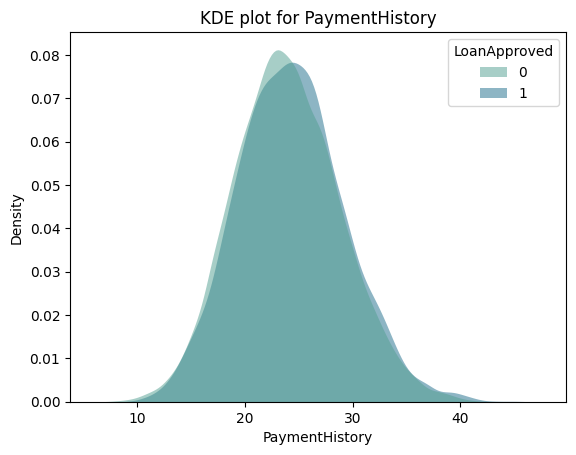

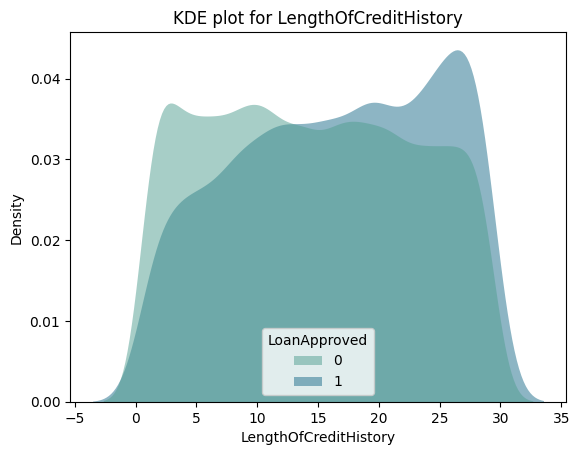

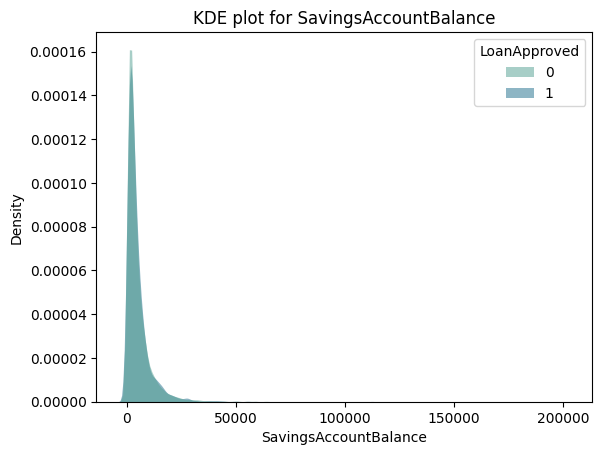

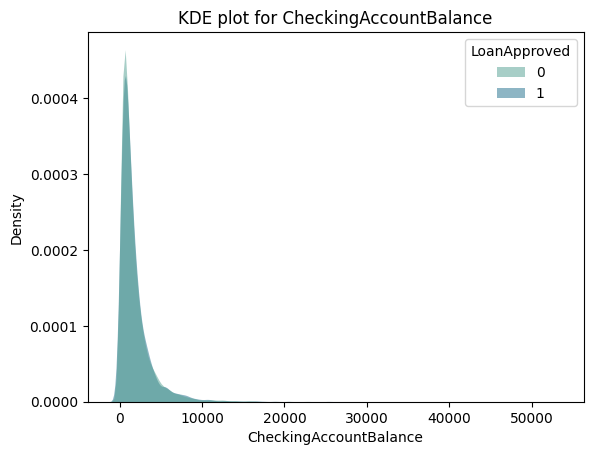

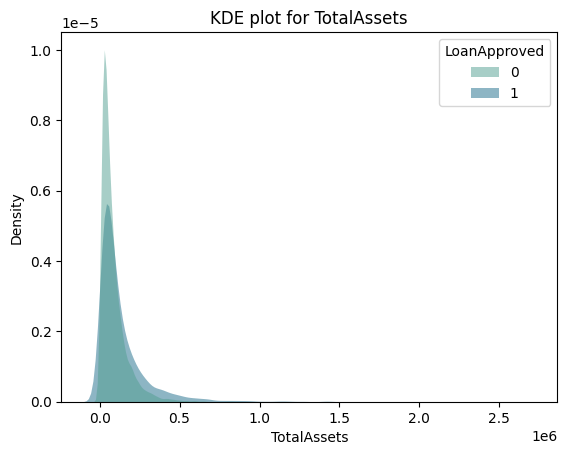

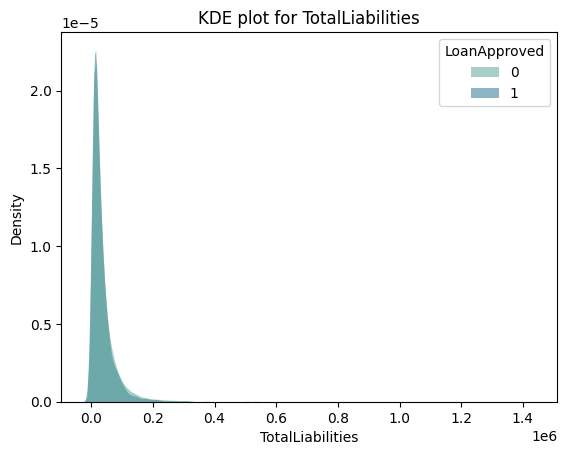

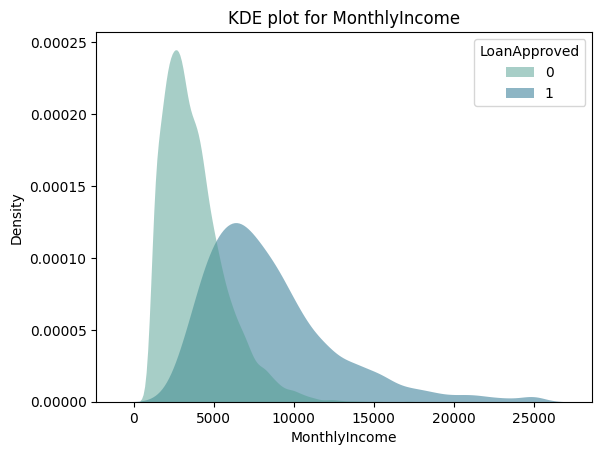

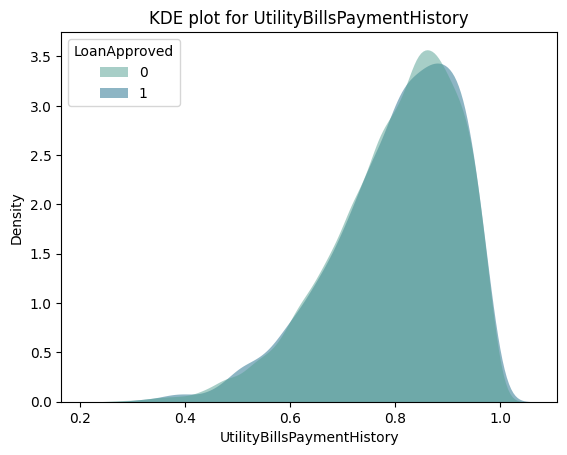

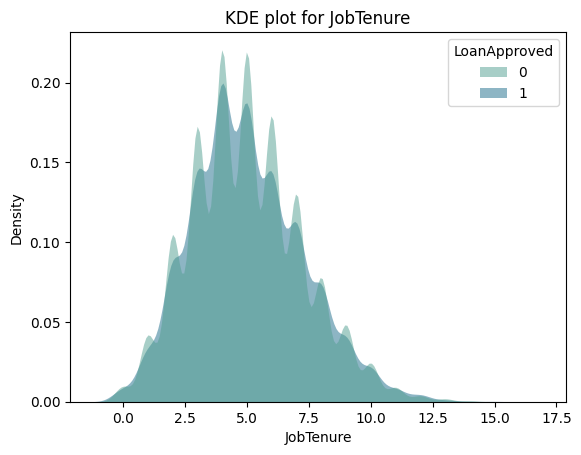

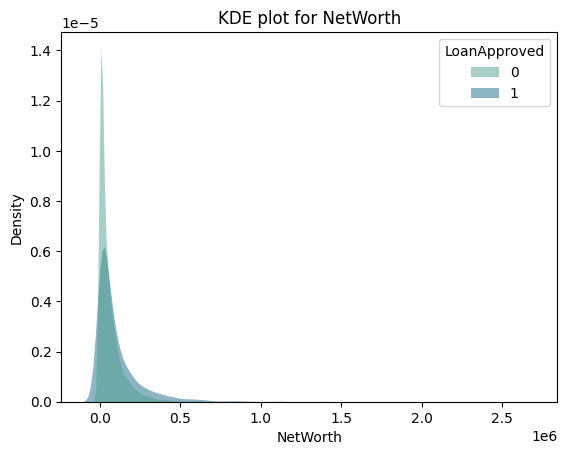

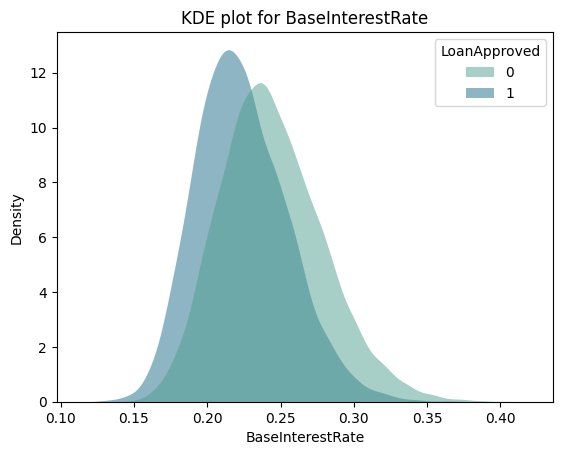

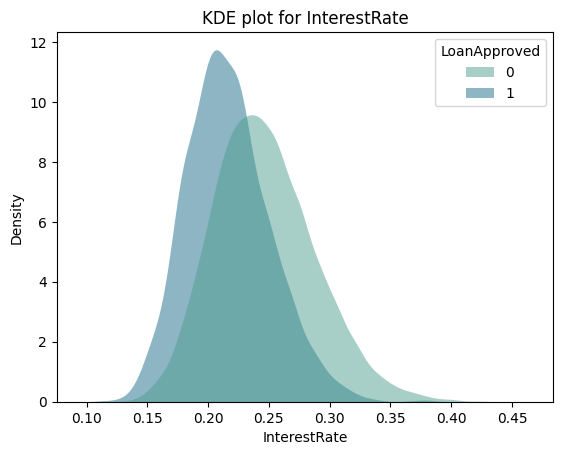

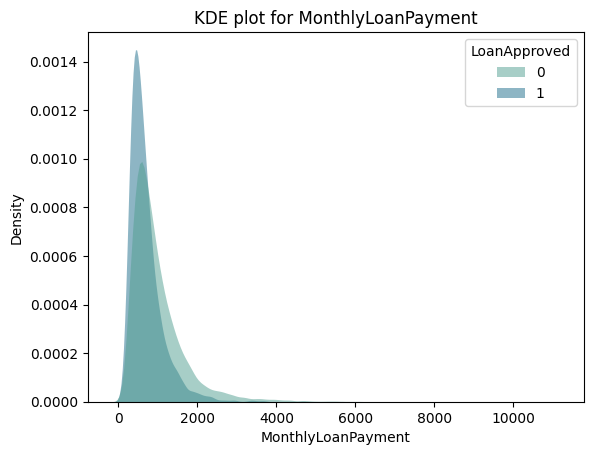

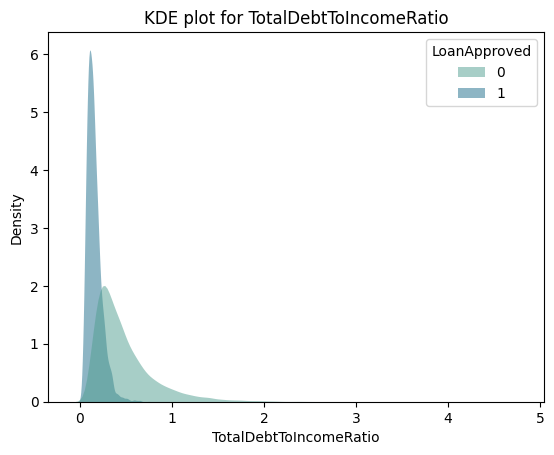

In [72]:
for i, col in enumerate(numerical_features):
    sns.kdeplot(data=data, x=col, hue="LoanApproved", fill=True, common_norm=False, palette="crest", alpha=.5, linewidth=0)
    plt.title(f"KDE plot for {col}")
    plt.show()

In [81]:
interest_features = ["AnnualIncome","CreditScore","InterestRate","TotalDebtToIncomeRatio"]

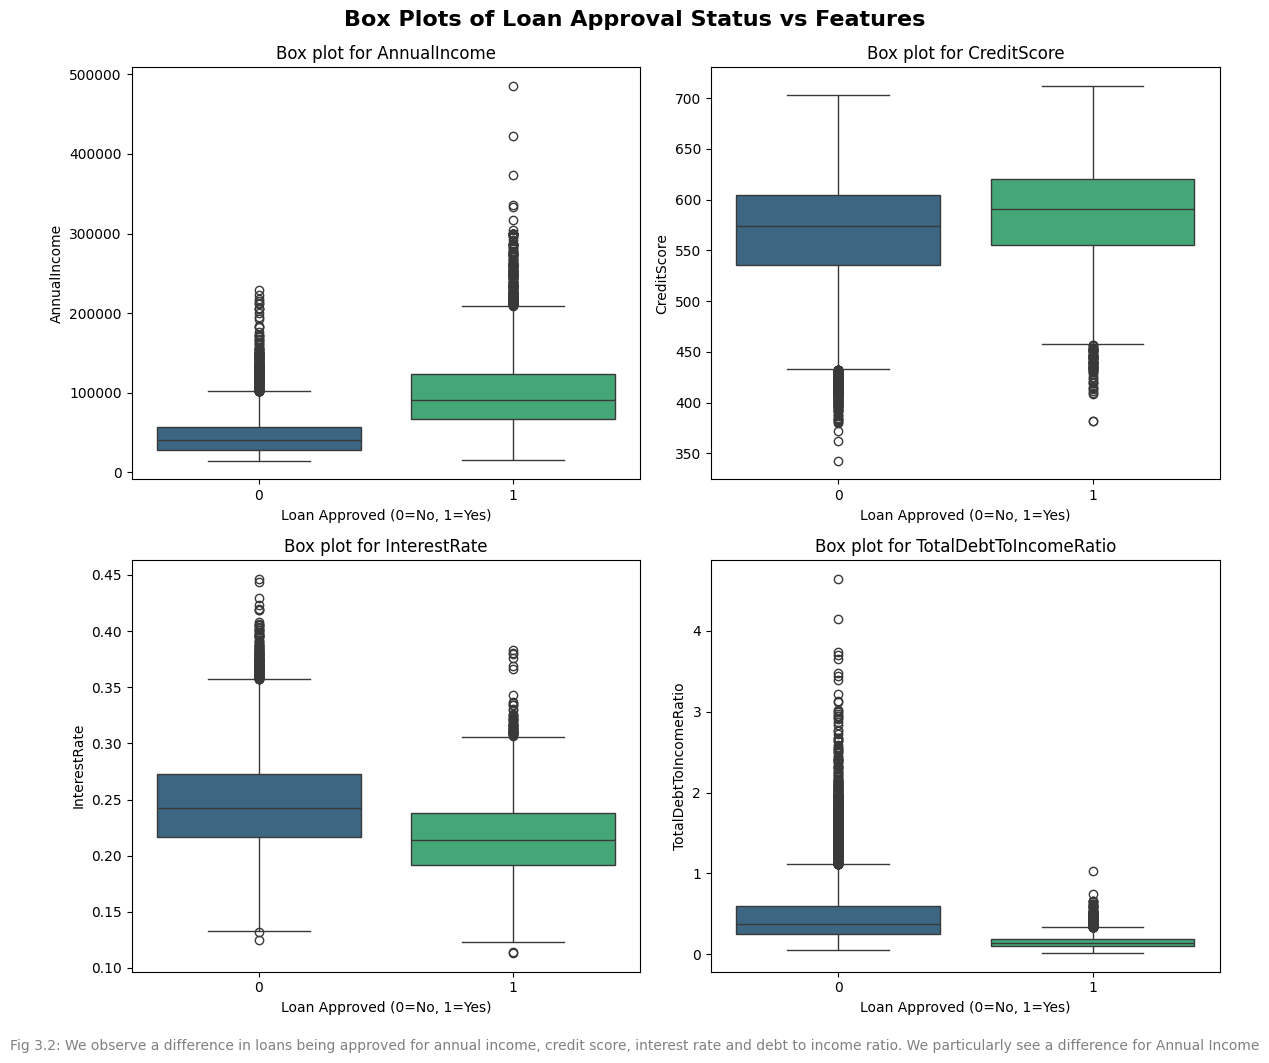

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(interest_features):
    sns.boxplot(data=data, x="LoanApproved", y=col, palette="viridis", ax=axes[i])
    axes[i].set_title(f"Box plot for {col}", fontsize=12)
    axes[i].set_xlabel("Loan Approved (0=No, 1=Yes)")
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.suptitle("Box Plots of Loan Approval Status vs Features", fontsize=16, fontweight="bold", y=1.02)
fig.text(0.5, -0.02, 'Fig 3.2: We observe a difference in loans being approved for annual income, credit score, interest rate and debt to income ratio. We particularly see a difference for Annual Income', ha='center', fontsize=10, color='gray')
plt.show()

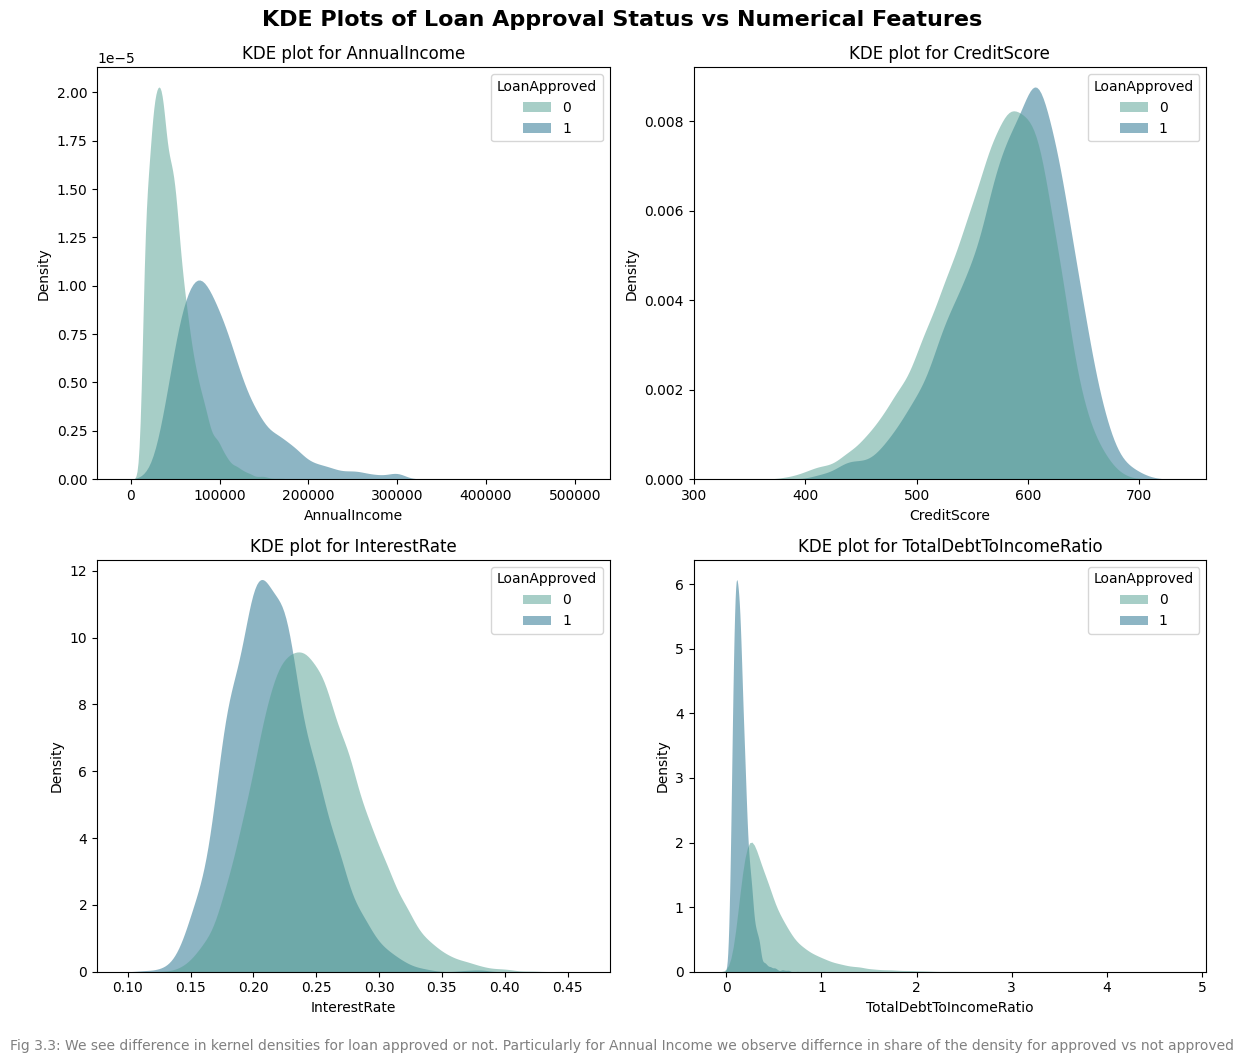

In [87]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Create KDE plots for each numerical feature
for i, col in enumerate(interest_features):
    sns.kdeplot(
        data=data, 
        x=col, 
        hue="LoanApproved", 
        fill=True, 
        common_norm=False, 
        palette="crest", 
        alpha=0.5, 
        linewidth=0, 
        ax=axes[i]
    )
    axes[i].set_title(f"KDE plot for {col}", fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

# Adjust layout and add a main title
plt.tight_layout()
plt.suptitle("KDE Plots of Loan Approval Status vs Numerical Features", fontsize=16, fontweight="bold", y=1.02)
fig.text(0.5, -0.02, 'Fig 3.3: We see difference in kernel densities for loan approved or not. Particularly for Annual Income we observe differnce in share of the density for approved vs not approved', 
         ha='center', fontsize=10, color='gray')
plt.show()